In [44]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

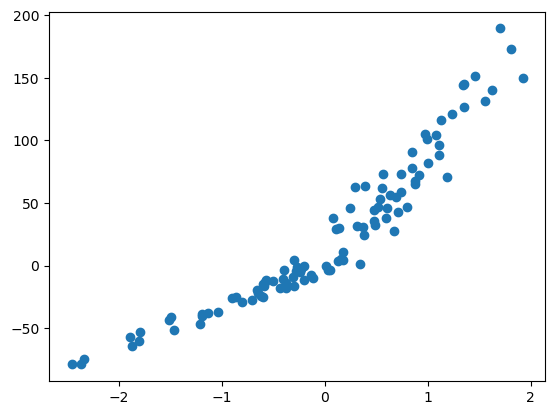

In [45]:
x, y = make_regression(n_samples = 100, n_features = 1, noise = 10)
y = y + abs(y / 2)
plt.scatter(x[:, 0], y)

3


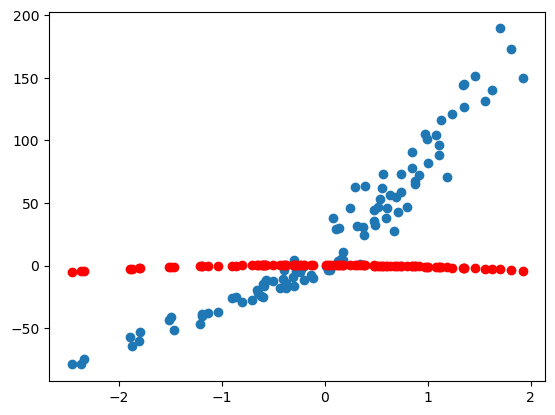

In [48]:
y = y.reshape(y.shape[0], 1)
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x ** 2, X))
theta = np.random.randn(X.shape[1], 1)
def model(X, theta):
    return X.dot(theta)

plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], model(X, theta), c = 'r')

In [ ]:
def cost_function(X, y, theta):
    m = len(y)
    return  1 / (2 * m) * np.sum((model(X, theta) - y) ** 2)

def grad(X, y, theta):
    m = len(y)
    return  1 / m * X.T.dot(model(X, theta) - y)

def gradien_descent(X, y, theta, learning_rate, n_iterations):
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
    return theta

In [ ]:
theta_final = gradien_descent(X, y, theta, learning_rate = 0.01, n_iterations = 1000)
theta_final

array([[10.81115104],
       [69.90963667],
       [19.35532247]])

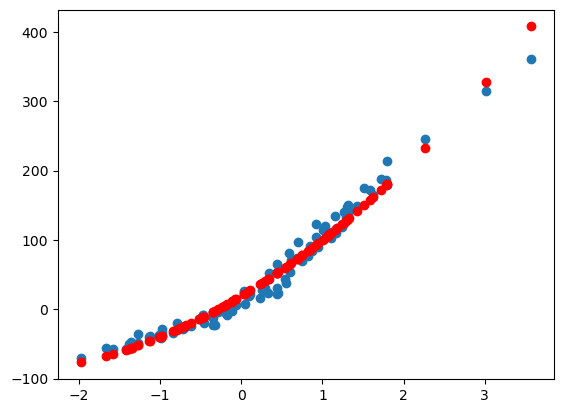

In [ ]:
prediction = model(X, theta_final)
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], prediction, c = 'r')

In [ ]:
def coef_determination(y, pred):
    u = ((y - pred) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - u / v

coef_determination(y, prediction)

0.9765740446521137